In [ ]:
import requests
from bs4 import BeautifulSoup
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Define path inside your Google Drive
drive_path = "/content/drive/MyDrive/new_wrexhamuniversity_scraped_data"

# Create the folder if it doesn't exist
os.makedirs(drive_path, exist_ok=True)



We store URLs of useful university pages in a dictionary.
Each key represents the filename to save as, and each value is the page URL.


In [ ]:
pages = {
    "home": "https://wrexham.ac.uk/",
    "about": "https://wrexham.ac.uk/about/",
    "quality_assurance": "https://wrexham.ac.uk/about/quality-assurance-agency/",
    "information_governance": "https://wrexham.ac.uk/information-governance/",
    "welsh_language": "https://wrexham.ac.uk/about/welsh-at-wrexham-university/",
    "governance": "https://wrexham.ac.uk/about/governance/",
    "vision_and_strategy": "https://wrexham.ac.uk/about/vision-and-strategy/",
    "equality_and_diversity": "https://wrexham.ac.uk/about/equality-and-diversity/",
    "civic_mission": "https://wrexham.ac.uk/about/civic-mission/",
    "safeguarding": "https://wrexham.ac.uk/about/safeguarding/",
    "policies_documents": "https://wrexham.ac.uk/about/policies-statements-and-documents/",
    "sustainability": "https://wrexham.ac.uk/sustainability/",
    "carbon_management": "https://wrexham.ac.uk/sustainability/carbon-management/",
    "people_sustainability": "https://wrexham.ac.uk/sustainability/people/",
    "undergraduate_courses": "https://wrexham.ac.uk/courses/undergraduate-courses/",
    "postgraduate_courses": "https://wrexham.ac.uk/courses/postgraduate-courses/",
    "short_courses": "https://wrexham.ac.uk/courses/short-courses/",
    "online_courses": "https://online.wrexham.ac.uk/",
    "online_short_courses": "https://wrexham.ac.uk/courses/online-short-courses/",
    "admissions": "https://wrexham.ac.uk/study/apply/",
    "international_students": "https://wrexham.ac.uk/international-students/",
    "fees_and_funding": "https://wrexham.ac.uk/fees-and-funding/",
    "undergraduate_fees": "https://wrexham.ac.uk/fees-and-funding/undergraduate-fees/",
    "postgraduate_fees": "https://wrexham.ac.uk/fees-and-funding/postgraduate-fees/",
    "undergraduate_funding": "https://wrexham.ac.uk/fees-and-funding/undergraduate-funding/",
    "international_fees": "https://wrexham.ac.uk/international-students/international-fees/",
    "entry_requirement": "https://wrexham.ac.uk/international-students/international-academic-entry-requirements/",
    "student_life": "https://wrexham.ac.uk/student-life/",
    "campus_and_facilities": "https://wrexham.ac.uk/campuses-and-facilities/",
    "accommodation": "https://wrexham.ac.uk/accommodation/",
    "student_support": "https://wrexham.ac.uk/student-support/",
    "inclusion_services": "https://wrexham.ac.uk/student-support/inclusion/",
    "student_stories": "https://wrexham.ac.uk/student-life/student-stories/",
    "discover_wrexham": "https://wrexham.ac.uk/student-life/discover-wrexham/",
    "cost_of_living": "https://wrexham.ac.uk/student-life/cost-of-living/",
    "chat_to_student": "https://wrexham.ac.uk/chat-to-a-student/",
    "student_portal": "https://myuni.wrexham.ac.uk/",
    "term_dates": "https://wrexham.ac.uk/term-dates/",
    "blog": "https://wrexham.ac.uk/blog/",
    "how_to_find_us": "https://wrexham.ac.uk/how-to-find-us/",
    "alumni": "https://wrexham.ac.uk/alumni/",
    "business_services": "https://wrexham.ac.uk/business/",
    "staff_profiles": "https://wrexham.ac.uk/staff-profiles/",
    "store": "https://store.wrexham.ac.uk/"
}


Web Scraping Function
This function:
- Sends a GET request to the given URL
- Parses HTML using BeautifulSoup
- Extracts the page title and all paragraphs (`<p>`)
- Returns them as a list of strings

In [ ]:
def scrape_page(url):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        title = soup.title.text.strip() if soup.title else "No Title"
        paragraphs = [p.text.strip() for p in soup.find_all("p") if p.text.strip()]
        return title, paragraphs
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return "Error", []


In [ ]:
def save_to_markdown(title, paragraphs, filename):
    filepath = os.path.join(drive_path, f"{filename}.md")
    with open(filepath, "w", encoding="utf-8") as f:
        f.write(f"# {title}\n\n")
        for para in paragraphs:
            f.write(f"{para}\n\n")
    print(f"✅ Saved to: {filepath}")


In [ ]:
for filename, url in pages.items():
    print(f"Scraping: {url}")
    title, content = scrape_page(url)
    save_to_markdown(title, content, filename)


Scraping: https://wrexham.ac.uk/
✅ Saved to: /content/drive/MyDrive/new_wrexhamuniversity_scraped_data/home.md
Scraping: https://wrexham.ac.uk/about/
✅ Saved to: /content/drive/MyDrive/new_wrexhamuniversity_scraped_data/about.md
Scraping: https://wrexham.ac.uk/about/quality-assurance-agency/
✅ Saved to: /content/drive/MyDrive/new_wrexhamuniversity_scraped_data/quality_assurance.md
Scraping: https://wrexham.ac.uk/information-governance/
✅ Saved to: /content/drive/MyDrive/new_wrexhamuniversity_scraped_data/information_governance.md
Scraping: https://wrexham.ac.uk/about/welsh-at-wrexham-university/
✅ Saved to: /content/drive/MyDrive/new_wrexhamuniversity_scraped_data/welsh_language.md
Scraping: https://wrexham.ac.uk/about/governance/
✅ Saved to: /content/drive/MyDrive/new_wrexhamuniversity_scraped_data/governance.md
Scraping: https://wrexham.ac.uk/about/vision-and-strategy/
✅ Saved to: /content/drive/MyDrive/new_wrexhamuniversity_scraped_data/vision_and_strategy.md
Scraping: https://wrexh

In [ ]:
import pandas as pd

word_counts = []
for filename, url in pages.items():
    filepath = os.path.join(drive_path, f"{filename}.md")
    if os.path.exists(filepath):
        with open(filepath, "r", encoding="utf-8") as f:
            content = f.read()
            # Simple word count: split by whitespace
            word_count = len(content.split())
            word_counts.append({'page': filename, 'word_count': word_count})
    else:
        print(f"Warning: File not found for {filename} at {filepath}. Word count will be 0.")
        word_counts.append({'page': filename, 'word_count': 0})

word_count = pd.DataFrame(word_counts)

# Display the word count DataFrame
word_count

,page,word_count
0,home,217
1,about,226
2,quality_assurance,259
3,information_governance,207
4,welsh_language,632
5,governance,524
6,vision_and_strategy,379
7,equality_and_diversity,575
8,civic_mission,454
9,safeguarding,215


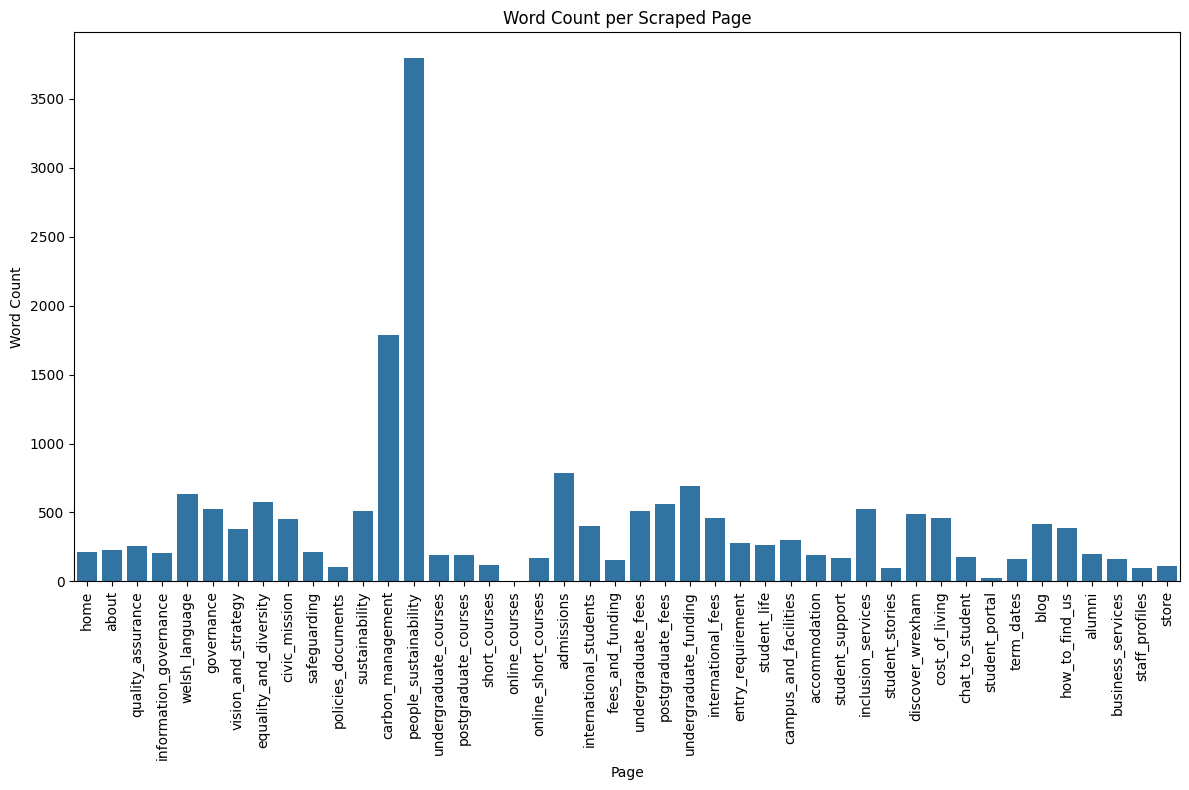

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='page', y='word_count', data=word_count)
plt.xticks(rotation=90)
plt.xlabel('Page')
plt.ylabel('Word Count')
plt.title('Word Count per Scraped Page')
plt.tight_layout()
plt.show()

In [ ]:
print(len(pages))

44


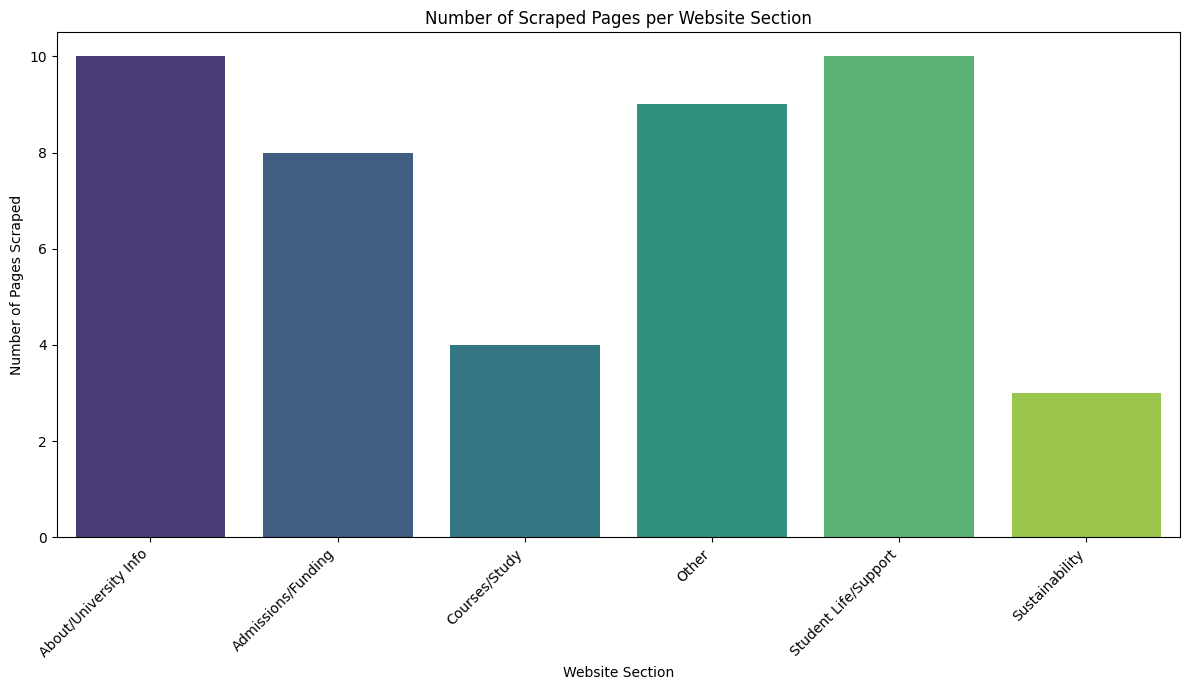

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define a mapping from page filenames to broader sections (corrected mapping)
page_to_section = {
    "home": "Other",
    "about": "About/University Info",
    "quality_assurance": "About/University Info",
    "information_governance": "About/University Info",
    "welsh_language": "About/University Info",
    "governance": "About/University Info",
    "vision_and_strategy": "About/University Info",
    "equality_and_diversity": "About/University Info",
    "civic_mission": "About/University Info",
    "safeguarding": "About/University Info",
    "policies_documents": "About/University Info",
    "carbon_management": "Sustainability",
    "people_sustainability": "Sustainability",
    "undergraduate_courses": "Courses/Study",
    "postgraduate_courses": "Courses/Study",
    "short_courses": "Courses/Study",
    "online_courses": "Courses/Study",
    "research_degrees": "Courses/Study",
    "admissions": "Admissions/Funding",
    "international_students": "Admissions/Funding",
    "fees_and_funding": "Admissions/Funding",
    "undergraduate_fees": "Admissions/Funding",
    "postgraduate_fees": "Admissions/Funding",
    "undergraduate_funding": "Admissions/Funding",
    "international_fees": "Admissions/Funding",
    "entry_requirement": "Admissions/Funding",
    "student_life": "Student Life/Support",
    "campus_and_facilities": "Student Life/Support",
    "accommodation": "Student Life/Support",
    "student_support": "Student Life/Support",
    "inclusion_services": "Student Life/Support",
    "student_stories": "Student Life/Support",
    "discover_wrexham": "Student Life/Support",
    "cost_of_living": "Student Life/Support",
    "chat_to_student": "Student Life/Support",
    "student_portal": "Student Life/Support",
    "term_dates": "Other",
    "blog": "Other",
    "how_to_find_us": "Other",
    "alumni": "Other",
    "business_services": "Other",
    "staff_profiles": "Other",
    "store": "Other",
    "sustainability": "Sustainability"

}
word_count['section'] = word_count['page'].apply(lambda x: page_to_section.get(x, 'Other'))

# Group by section and count the number of pages in each section
section_page_counts = word_count.groupby('section').size().reset_index(name='page_count')

# Plot the bar chart
plt.figure(figsize=(12, 7))
# Modified line to explicitly set hue to x and legend=False to suppress FutureWarning
sns.barplot(x='section', y='page_count', data=section_page_counts, palette='viridis', hue='section', legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Website Section')
plt.ylabel('Number of Pages Scraped')
plt.title('Number of Scraped Pages per Website Section')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
